# Kaggle Competition:  Iceberg or Ship

# resnet18 architecture

In [1]:
!ls -l

total 1956
-rw-rw-r-- 1 ubuntu ubuntu 625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  13445 Jan 14 18:36 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  64953 Jan 14 18:52 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 108974 Jan 14 19:28 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 137540 Jan 14 18:36 baseline.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    536 Jan 14 18:36 helper.py
-rw-rw-r-- 1 ubuntu ubuntu 767392 Jan 14 18:36 other_groverpr.ipynb
drwxrwxr-x 2 ubuntu ubuntu   4096 Jan 14 18:51 __pycache__
-rw-rw-r-- 1 ubuntu ubuntu    399 Jan 14 18:59 README.md


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973260
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 45 ubuntu ubuntu       4096 Jan 14 18:51 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnet18
sz=75
bs=32
lr = 1e-2

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 32/41 [00:00<00:00, 36.56it/s, loss=5.13] 


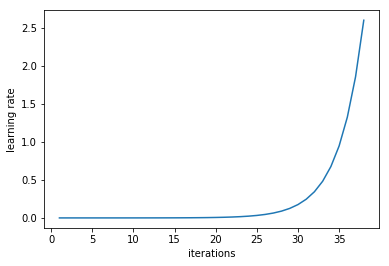

In [12]:
learn.sched.plot_lr()

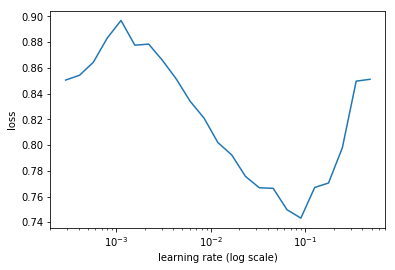

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 8)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

[0.      0.6041  0.52777 0.70454]                          
[1.      0.53134 0.4256  0.72159]                          
[2.      0.49774 0.3859  0.82671]                          
[3.      0.48287 0.43395 0.80114]                          
[4.      0.49255 0.40146 0.81818]                           
[5.      0.4783  0.37105 0.83523]                           
[6.      0.49191 0.38843 0.83807]                          
[7.      0.45562 0.343   0.84943]                          



### Stochastic Gradient Descent with Restart

In [15]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.47041 0.35225 0.82671]                          
[1.      0.48077 0.39135 0.80398]                          
[2.      0.46753 0.36833 0.82102]                          
[3.      0.47293 0.38059 0.80682]                          
[4.      0.45999 0.36337 0.81534]                          
[5.      0.46621 0.37815 0.80966]                          
[6.      0.44924 0.38388 0.81534]                          



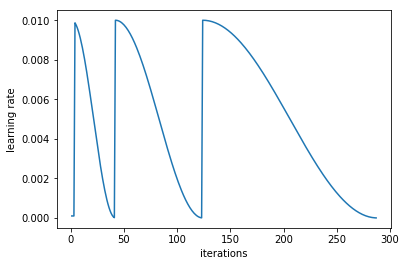

In [16]:
learn.sched.plot_lr()

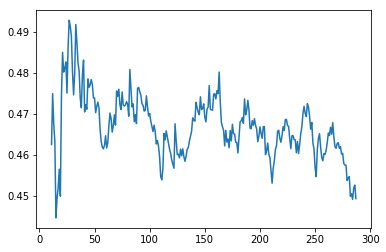

In [17]:
learn.sched.plot_loss()

In [ ]:
lr/10

In [ ]:
lr/9

In [ ]:
lr/3

In [ ]:
lr/4

### Unfreeze Layers

In [18]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


In [19]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.57343 0.51029 0.74148]                          
[1.      0.56622 0.42955 0.80682]                          
[2.      0.53422 0.46505 0.75568]                          
[3.      0.53436 0.52334 0.75852]                          
[4.      0.50635 0.46163 0.78693]                          
[5.      0.50535 0.67034 0.71875]                          
[6.      0.44798 0.6415  0.71591]                          



In [20]:
learn.save('resnet18_sz75')

In [21]:
learn.load('resnet18_sz75')

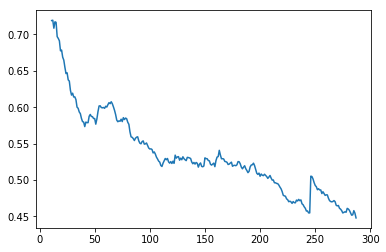

In [22]:
learn.sched.plot_loss()

In [23]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.3969869059268904, 0.8348909657320872)

In [24]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.41443 0.54108 0.72727]                          
[1.      0.42096 0.62856 0.74148]                          
[2.      0.42631 0.54198 0.73011]                          
[3.      0.45821 0.67444 0.73011]                          
[4.      0.48004 0.59458 0.72159]                          
[5.      0.48985 0.51787 0.75568]                          
[6.      0.46761 0.74335 0.67614]                          



In [25]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.4486  0.44496 0.76989]                          
[1.      0.48508 0.50229 0.73296]                          
[2.      0.47162 0.52658 0.71591]                          
[3.      0.44984 0.42194 0.79546]                          
[4.      0.43821 0.35354 0.81818]                          
[5.      0.39319 0.49475 0.78125]                          
[6.      0.36623 0.48774 0.78977]                          



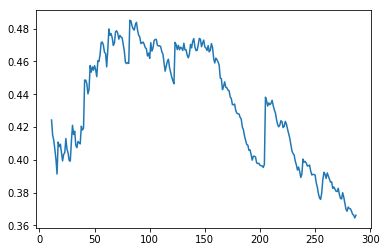

In [27]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [26]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.29188548409538867, 0.8722741433021807)

## Save predictions

In [ ]:
test_df = pd.read_json(PATH+"/test.json")
helper.make_test_file(log_preds,test_df,model_name='resnet18_sz75_zm13_bs32_comp_band',
                      classes=data.classes,
                      submission_folder =f'{PATH}sub'
                     )